In [11]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
# More info on https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%204%20-%20Lesson%202%20-%20Notebook.ipynb

In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.4):
            print('\nLoss is low, thus we cancel training')
            self.model.stop_training = True

IMPORTANT NOTE:



Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling model.fit asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.


In [13]:
callbacks = myCallback()
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

9
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.  

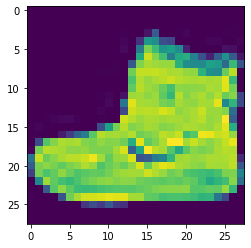

In [24]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0]),
print(train_labels[0])
print(train_images[0])

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [16]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer = tf.compat.v1.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5922
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3652

Loss is low, thus we cancel training


In [19]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3830


0.3829944133758545

In [20]:
classifications = model.predict(test_images)

print(classifications[0])

[9.4208386e-05 8.0362861e-06 1.2916713e-05 3.6173842e-06 2.4701578e-05
 6.5960124e-02 4.8810802e-05 1.4130421e-01 5.0365028e-04 7.9203969e-01]


5
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.  

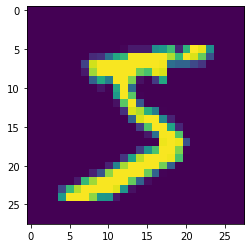

In [26]:
# For handwritten digits
class myCallbackDigits(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # In some versions, accuracy may come with key 'acc'
        if(logs.get('accuracy') > 0.99):
            print('\nReached 99% accuracy so cancelling training!')
            self.model.stop_training = True
            
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data(path='mnist.npz')
x_train = x_train / 255.0
x_test = x_test / 255.0

callback_digits = myCallbackDigits()

plt.imshow(x_train[0]),
print(y_train[0])
print(x_train[0])

In [27]:
model2 = tf.keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28,28)), # tranform the data of images (size 28x28) to a single dataset
        keras.layers.Dense(512, activation=tf.nn.relu), # neurons, make the calculations
        keras.layers.Dense(10, activation=tf.nn.softmax) # this determines the labels, as there are 10 digits
    ])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
a = model2.fit(x_train, y_train, epochs=10, callbacks=[callback_digits])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0213 - accuracy: 0.9934

Reached 99% accuracy so cancelling training!
